In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from imutils import face_utils, rotate_bound
import dlib
%matplotlib inline

In [2]:
cap = cv2.VideoCapture(0)

In [3]:
cap.isOpened()

True

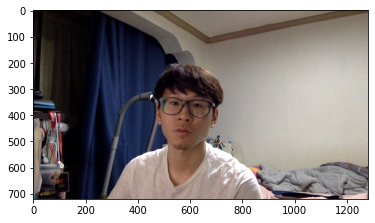

In [12]:
ret, frame = cap.read()
# frame = rotate_bound(frame, -90)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

In [14]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

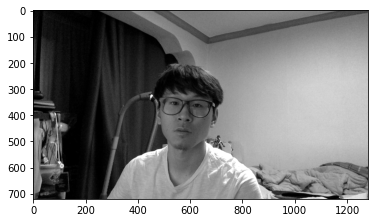

In [15]:
plt.imshow(gray, cmap='gray')

In [16]:
rects = detector(gray, 0)
rects.count

<bound method PyCapsule.count of rectangles[[(472, 305) (687, 520)]]>

In [17]:
image = frame.copy()
for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
    
        # Draw on our image, all the finded cordinate points (x,y) 
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
    

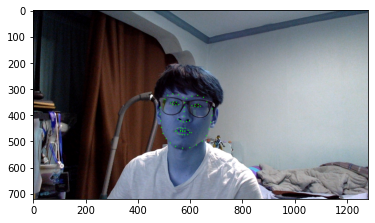

In [18]:
plt.imshow(image)

In [19]:
cap.release()